# 타이타닉 생존자 분석
## 코드잇 데이터분석 2주차 스터디 
### 진한나

### 1. DATA 불러오기 

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [53]:
file_patch_1 = "/Users/jinhanna/Desktop/train.csv"
train=pd.read_csv(file_patch_1)

In [55]:
file_patch_2 = "/Users/jinhanna/Desktop/test.csv"
test=pd.read_csv(file_patch_2)

### 2. 열 선택 (ex. 'Survived', 'Pclass', 'Sex', 'Age', 'Fare’)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
# 선택하려는 열 이름을 리스트로 지정 -> DF 생성 
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
train_selected = train[selected_columns]
print(train_selected.head())

   Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500


### 3. ‘나이가 20세 이상인 사람만 선택’ 해보기 (여러가지로 데이터 필터링 해보셔도 됩니다)

In [65]:
# 나이가 20세 이상인 사람만 필터링
train[train['Age'] >= 20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [67]:
# 운임이 50 이상인 사람만 필터링 
train[train['Fare'] >= 50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S


In [69]:
# 성별이 여자이면서 운임이 50 이상이고 나이가 20이상인 사람만 필터링
train[(train['Sex'] == 'female') & (train['Fare'] >= 50) & (train['Age'] >= 20)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S


### 4.새로운 열 추가하기 ( 이번 과제에서는 나이를 범주형으로 변환한 뒤 ‘Child’와 ‘Adult’로 구분해주세요)

In [77]:
# 연속형 변수를 범주형 변수로 변환한 뒤, np.where를 사용하여 나이를 19세 기준으로 나누기
train['AgeCategory'] = np.where(train['Age'] >= 19, 'Adult', 'Child')
print(train[['Age', 'AgeCategory']])

      Age AgeCategory
0    22.0       Adult
1    38.0       Adult
2    26.0       Adult
3    35.0       Adult
4    35.0       Adult
..    ...         ...
886  27.0       Adult
887  19.0       Adult
888   NaN       Child
889  26.0       Adult
890  32.0       Adult

[891 rows x 2 columns]


### 5.결측치 확인한 뒤 결측치를 평균값으로 채워 넣어주세요. (결측치가 많이 발생한 데이터는 삭제하셔도 됩니다)

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  AgeCategory  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


Age와 Cabin의 데이터 개수만 다른 것을 통해 두 변수에 결측치가 발생한 것을 알 수 있다. 
결측치가 많이 발생한 Cabin은 삭제하고 Age의 결측치는 평균값으로 채워 넣는다. 

In [83]:
# Cabin 삭제
train.drop(columns=['Cabin'], inplace=True)
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeCategory'],
      dtype='object')


In [85]:
#Age 결측치를 평균값으로 채우기
age_mean = train['Age'].mean()
train['Age'].fillna(age_mean, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  AgeCategory  891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 6.나이(Age)와 요금(Fare)의 분포를 히스토그램으로 그려주세요

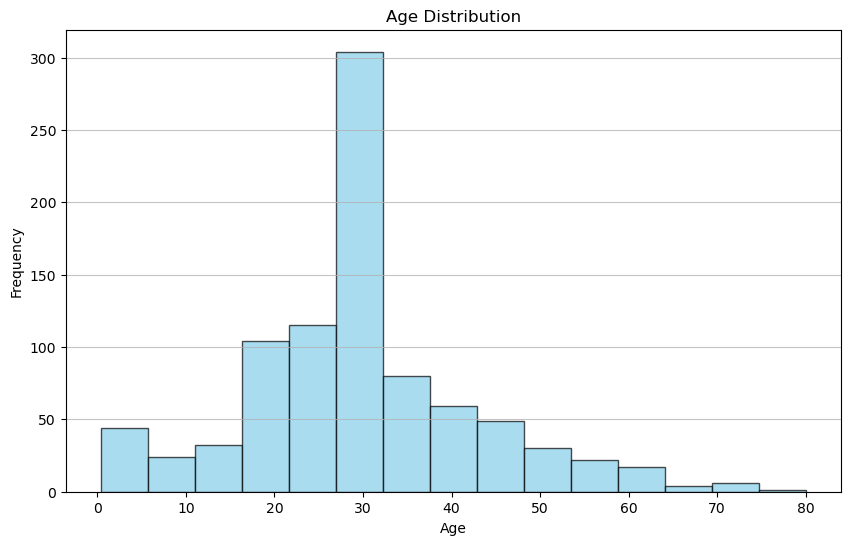

In [88]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.hist(train['Age'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)  # 히스토그램

# 그래프 제목 및 레이블 설정
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)  # y축 그리드 추가

# 그래프 출력
plt.show()

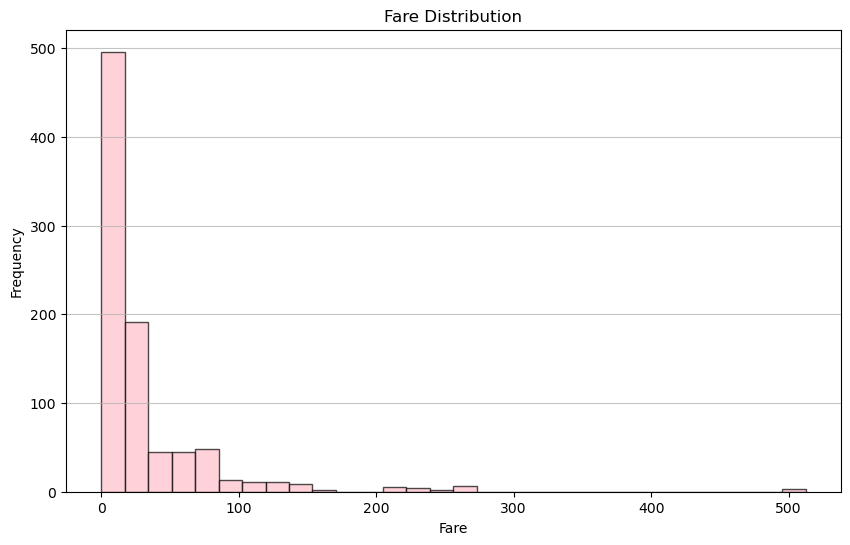

In [90]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.hist(train['Fare'], bins=30, color='pink', edgecolor='black', alpha=0.7)  # 히스토그램

# 그래프 제목 및 레이블 설정
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)  # y축 그리드 추가

# 그래프 출력
plt.show()

### 7.성별에 따른 생존율을 산점도로 그려주세요

In [93]:
# 성별에 따른 생존율 계산
# reset_index() 사용하여 데이터 프레임으로 변환 -> survival_rate 이라는 데이터 프레임에 Sex와 Survived 포함
survival_rate = train.groupby('Sex')['Survived'].mean().reset_index()
print(survival_rate)

      Sex  Survived
0  female  0.742038
1    male  0.188908


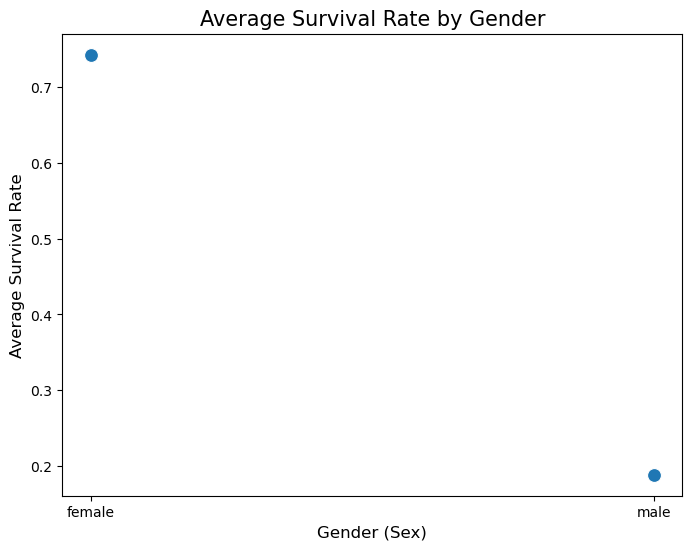

In [119]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sex', y='Survived', data=survival_rate, s=100)
plt.title('Average Survival Rate by Gender', fontsize=15)
plt.xlabel('Gender (Sex)', fontsize=12)
plt.ylabel('Average Survival Rate', fontsize=12)

plt.show()

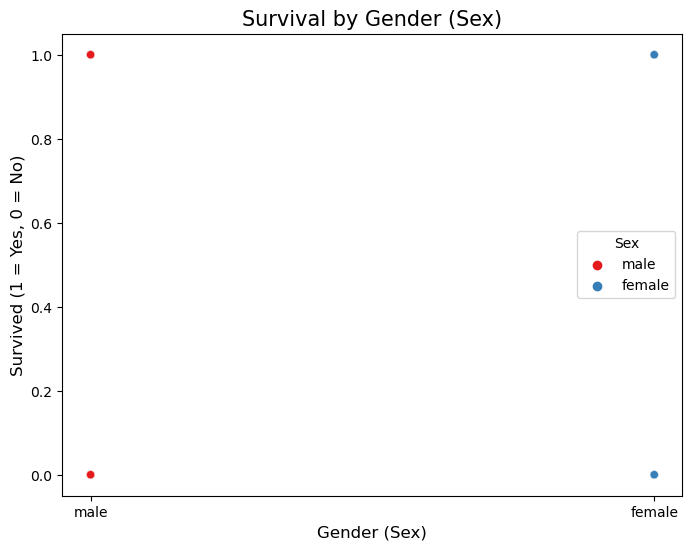

In [127]:
# 성별에 따른 생존 여부를 산점도로 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sex', y='Survived', data=train, hue='Sex', palette='Set1', alpha=0.6)

plt.title('Survival by Gender (Sex)', fontsize=15)
plt.xlabel('Gender (Sex)', fontsize=12)
plt.ylabel('Survived (1 = Yes, 0 = No)', fontsize=12)

plt.show()

In [129]:
# 성별과 나이 카테고리(AgeCategory)에 따른 생존율 평균 계산
survival_rate_age_sex = train.groupby(['Sex', 'AgeCategory'])['Survived'].mean().reset_index()
print(survival_rate_age_sex)


      Sex AgeCategory  Survived
0  female       Adult  0.782383
1  female       Child  0.677686
2    male       Adult  0.180628
3    male       Child  0.205128


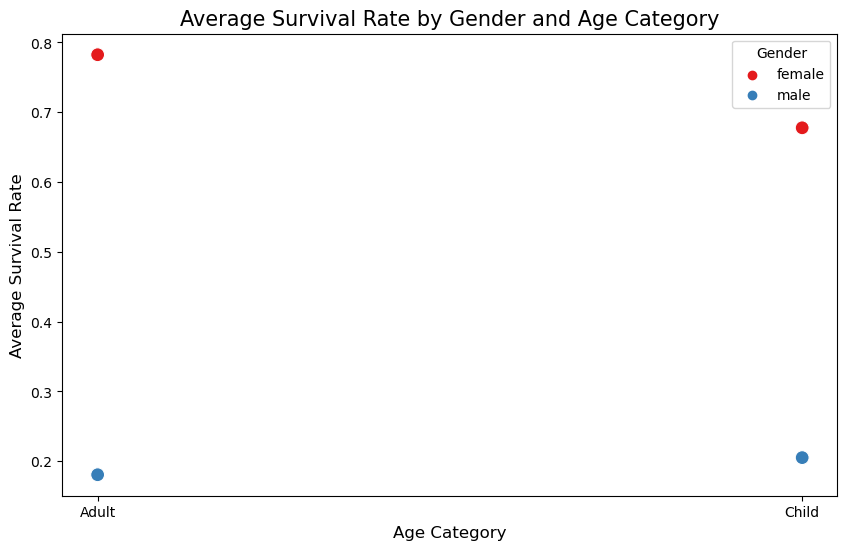

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# 성별과 나이 카테고리에 따른 생존율 평균을 산점도로 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AgeCategory', y='Survived', hue='Sex', data=survival_rate_age_sex, s=100, palette='Set1')
plt.title('Average Survival Rate by Gender and Age Category', fontsize=15)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Average Survival Rate', fontsize=12)
plt.legend(title='Gender')

plt.show()